# Imports

In [1]:
#Library to make GUI
from tkinter import messagebox
import tkinter as tk

import requests 
from bs4 import BeautifulSoup

import pandas as pd
import numpy as np

import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

import getpass

from fuzzywuzzy import fuzz

import matplotlib.pyplot as plt 

import functions as fn

from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score 

from sklearn.preprocessing import StandardScaler 

# Get Data from Billboard to know de 100 hot songs

In [2]:
# Create URL
url = "https://www.billboard.com/charts/hot-100/"

# Create a request
results=requests.get(url, headers = {"Accept-Language": "en-US"})

# Result in string
#results.text

# We use BeautifulSoup to extract specific results
soup = BeautifulSoup(results.content,'html.parser')

# Show results in html mode
#print(soup.prettify())

# Strip=True => You can tell Beautiful Soup to strip whitespace from the beginning and end of each bit of text
# Try get the first name of song
soup.select('h3.c-title.a-no-trucate')[0].get_text(strip=True)

# Try get the first artist of song
soup.select('span.c-label.a-no-trucate')[0].get_text(strip=True)

# Calculate the len of our select
len_songs = len(soup.select('h3.c-title.a-no-trucate'))

# Create variables to store results
song = []
artist = []

# Create a for to pick the 100 best songs
for x in range(len_songs):
    song.append(soup.select('h3.c-title.a-no-trucate')[x].get_text(strip=True))
    artist.append(soup.select('span.c-label.a-no-trucate')[x].get_text(strip=True))
    
# Import pandas to create a data frame
top = pd.DataFrame({'Song':song, 'Artist':artist})
#top

# Import numpy to add a Rank
top['Rank'] = np.arange(len(top))+1
top


,Song,Artist,Rank
0,We Don't Talk About Bruno,"Carolina Gaitan, Mauro Castillo, Adassa, Rhenz...",1
1,Heat Waves,Glass Animals,2
2,abcdefu,GAYLE,3
3,Easy On Me,Adele,4
4,Super Gremlin,Kodak Black,5
...,...,...,...
95,Closer,Saweetie Featuring H.E.R.,96
96,Cold December,Rod Wave,97
97,Get Into It (Yuh),Doja Cat,98
98,All Too Well (Taylor's Version),Taylor Swift,99


# Get playlist from Spotify to analice audio features

In [3]:
# Get usser and pass
client_id = str(getpass.getpass('client_id?'))
client_secret = str(getpass.getpass('client_secret?'))

# Create a conexion
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=client_id, client_secret=client_secret))

# Get random playlist
playlist = sp.user_playlist_tracks("Spotify","37i9dQZF1DX4WYpdgoIcn6")
playlist

client_id?········
client_secret?········


{'href': 'https://api.spotify.com/v1/playlists/37i9dQZF1DX4WYpdgoIcn6/tracks?offset=0&limit=100&additional_types=track',
 'items': [{'added_at': '2022-02-24T23:02:00Z',
   'added_by': {'external_urls': {'spotify': 'https://open.spotify.com/user/'},
    'href': 'https://api.spotify.com/v1/users/',
    'id': '',
    'type': 'user',
    'uri': 'spotify:user:'},
   'is_local': False,
   'primary_color': None,
   'track': {'album': {'album_type': 'single',
     'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/7okSU80WTrn4LXlyXYbX3P'},
       'href': 'https://api.spotify.com/v1/artists/7okSU80WTrn4LXlyXYbX3P',
       'id': '7okSU80WTrn4LXlyXYbX3P',
       'name': 'Clinton Kane',
       'type': 'artist',
       'uri': 'spotify:artist:7okSU80WTrn4LXlyXYbX3P'}],
     'available_markets': ['AD',
      'AE',
      'AG',
      'AL',
      'AM',
      'AO',
      'AR',
      'AT',
      'AU',
      'AZ',
      'BA',
      'BB',
      'BD',
      'BE',
      'BF',
      'BG

In [4]:
#dictionary comprehension 
list_info = {
  track["track"]["id"]: [track["track"]["name"], 
  track["track"]["artists"][0]["name"]] 
  for track in playlist["items"]
}
list_info

{'1is8gU4RVcN4J8xItxWoOY': ["I GUESS I'M IN LOVE", 'Clinton Kane'],
 '7eQHxigpuDJjCG50JyzU8v': ['Butterflies', 'MAX'],
 '0lx2cLdOt3piJbcaXIV74f': ['willow', 'Taylor Swift'],
 '0gplL1WMoJ6iYaPgMCL0gX': ['Easy On Me', 'Adele'],
 '312zSwwbPU7C3sTmro4Wx9': ["It's Ok If You Forget Me", 'Astrid S'],
 '0742PcMPo2Akmo4vHC29VZ': ['this is how you fall in love', 'Jeremy Zucker'],
 '0ohcCrxZkBfFbkuRPOZQZX': ['dancing in the kitchen', 'LANY'],
 '2KnLkZ3z7PO3kgVGHGqDpD': ["It'll Be Okay", 'Shawn Mendes'],
 '5WtfUKzXircvW8l5aaVZWT': ['What A Time (feat. Niall Horan)',
  'Julia Michaels'],
 '7lPN2DXiMsVn7XUKtOW1CS': ['drivers license', 'Olivia Rodrigo'],
 '4IQkfUsrwXol38VV3U7t7T': ['Run (feat. Ed Sheeran) (Taylor’s Version) (From The Vault)',
  'Taylor Swift'],
 '6OcCk1dbAb7XNHsC098oEM': ['I Quit Drinking', 'Kelsea Ballerini'],
 '1nYzjrdVQ8RpF93M0jPFW7': ['Remember That Night?', 'Sara Kays'],
 '6GH4tLwGW6HliKbZBdt6hD': ['Unlearn (with Gracie Abrams)', 'benny blanco'],
 '2h9TDNEXRhcDIV3fsoEVq9': ['Wha

In [5]:
# As we have limit 100, need do while to get all songs of the play list
# While playlist have next we can get new data
def get_tracks(playlist):
    tracks = playlist['items']
    while playlist['next']:
        playlist = sp.next(playlist)
        tracks.extend(playlist['items'])
    return tracks
first_results = get_tracks(playlist)

# get track list with url uri or ID for each track - ID in this case
audio_feats = []
for x in range(len(first_results)):
    audio_feats.extend(sp.audio_features(tracks=first_results[x]['track']['id']))

# Transform in to Dataframe
data = pd.DataFrame(audio_feats)
data

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.422,0.340,0,-6.577,1,0.0351,0.8770,0.000018,0.1490,0.223,77.213,audio_features,1is8gU4RVcN4J8xItxWoOY,spotify:track:1is8gU4RVcN4J8xItxWoOY,https://api.spotify.com/v1/tracks/1is8gU4RVcN4...,https://api.spotify.com/v1/audio-analysis/1is8...,204094,4
1,0.700,0.613,11,-4.041,1,0.0408,0.3850,0.000000,0.0887,0.420,88.084,audio_features,7eQHxigpuDJjCG50JyzU8v,spotify:track:7eQHxigpuDJjCG50JyzU8v,https://api.spotify.com/v1/tracks/7eQHxigpuDJj...,https://api.spotify.com/v1/audio-analysis/7eQH...,191250,4
2,0.392,0.574,7,-9.195,1,0.1700,0.8330,0.001790,0.1450,0.529,81.112,audio_features,0lx2cLdOt3piJbcaXIV74f,spotify:track:0lx2cLdOt3piJbcaXIV74f,https://api.spotify.com/v1/tracks/0lx2cLdOt3pi...,https://api.spotify.com/v1/audio-analysis/0lx2...,214707,4
3,0.604,0.366,5,-7.519,1,0.0282,0.5780,0.000000,0.1330,0.130,141.981,audio_features,0gplL1WMoJ6iYaPgMCL0gX,spotify:track:0gplL1WMoJ6iYaPgMCL0gX,https://api.spotify.com/v1/tracks/0gplL1WMoJ6i...,https://api.spotify.com/v1/audio-analysis/0gpl...,224695,4
4,0.562,0.379,6,-7.625,1,0.2310,0.5260,0.000000,0.1510,0.258,171.848,audio_features,312zSwwbPU7C3sTmro4Wx9,spotify:track:312zSwwbPU7C3sTmro4Wx9,https://api.spotify.com/v1/tracks/312zSwwbPU7C...,https://api.spotify.com/v1/audio-analysis/312z...,204989,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,0.775,0.410,3,-7.481,1,0.0464,0.7240,0.000026,0.1140,0.298,117.165,audio_features,0NbDnRbBxUaT27CTgmraSG,spotify:track:0NbDnRbBxUaT27CTgmraSG,https://api.spotify.com/v1/tracks/0NbDnRbBxUaT...,https://api.spotify.com/v1/audio-analysis/0NbD...,186733,4
126,0.634,0.285,9,-14.007,0,0.0807,0.9370,0.000359,0.2320,0.203,129.650,audio_features,5qNh5WtzMbfpSj2jLlBkoD,spotify:track:5qNh5WtzMbfpSj2jLlBkoD,https://api.spotify.com/v1/tracks/5qNh5WtzMbfp...,https://api.spotify.com/v1/audio-analysis/5qNh...,245897,4
127,0.614,0.647,0,-4.681,0,0.0524,0.0687,0.000000,0.1040,0.368,163.862,audio_features,1HimGOB6BjOaCQYMIF1xtU,spotify:track:1HimGOB6BjOaCQYMIF1xtU,https://api.spotify.com/v1/tracks/1HimGOB6BjOa...,https://api.spotify.com/v1/audio-analysis/1Him...,184665,4
128,0.517,0.435,9,-7.532,1,0.0278,0.4000,0.000000,0.1230,0.335,97.931,audio_features,5Tl8bvgo5shLODXiT9ckva,spotify:track:5Tl8bvgo5shLODXiT9ckva,https://api.spotify.com/v1/tracks/5Tl8bvgo5shL...,https://api.spotify.com/v1/audio-analysis/5Tl8...,200220,4


# Apply clustering

## With scaled data

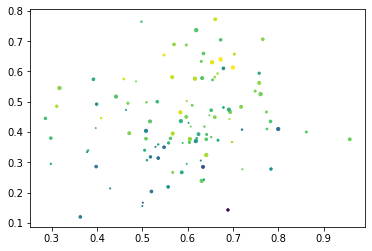

In [6]:
# fast lock to our data
plt.scatter(data.iloc[:,0],data.iloc[:,1], data.iloc[:,2],data.iloc[:,3])

In [7]:
# get the main columns for  clustering
data_selected = data[['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence','tempo']]
data_selected

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.422,0.340,-6.577,0.0351,0.8770,0.000018,0.1490,0.223,77.213
1,0.700,0.613,-4.041,0.0408,0.3850,0.000000,0.0887,0.420,88.084
2,0.392,0.574,-9.195,0.1700,0.8330,0.001790,0.1450,0.529,81.112
3,0.604,0.366,-7.519,0.0282,0.5780,0.000000,0.1330,0.130,141.981
4,0.562,0.379,-7.625,0.2310,0.5260,0.000000,0.1510,0.258,171.848
...,...,...,...,...,...,...,...,...,...
125,0.775,0.410,-7.481,0.0464,0.7240,0.000026,0.1140,0.298,117.165
126,0.634,0.285,-14.007,0.0807,0.9370,0.000359,0.2320,0.203,129.650
127,0.614,0.647,-4.681,0.0524,0.0687,0.000000,0.1040,0.368,163.862
128,0.517,0.435,-7.532,0.0278,0.4000,0.000000,0.1230,0.335,97.931


In [8]:
# Scale data
data_scaled = fn.st_scaler (data_selected)
data_scaled

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,-1.316265,-0.724237,0.642356,-0.473417,1.277695,-0.133846,0.099734,-0.631966,-1.272414
1,0.915278,1.226520,1.679920,-0.387975,-0.387818,-0.136286,-0.627059,0.547063,-0.911494
2,-1.557079,0.947840,-0.428757,1.548728,1.128747,0.110435,0.051522,1.199419,-1.142966
3,0.144674,-0.538451,0.256952,-0.576848,0.265524,-0.136286,-0.093114,-1.188563,0.877905
4,-0.192466,-0.445557,0.213584,2.463115,0.089494,-0.136286,0.123839,-0.422494,1.869499
...,...,...,...,...,...,...,...,...,...
125,1.517314,-0.224043,0.272499,-0.304031,0.759761,-0.132674,-0.322120,-0.183097,0.054005
126,0.385488,-1.117247,-2.397510,0.210125,1.480807,-0.086804,1.100129,-0.751664,0.468512
127,0.224945,1.469471,1.418074,-0.214091,-1.458554,-0.136286,-0.442649,0.235847,1.604362
128,-0.553687,-0.045402,0.251633,-0.582844,-0.337040,-0.136286,-0.213643,0.038345,-0.584570


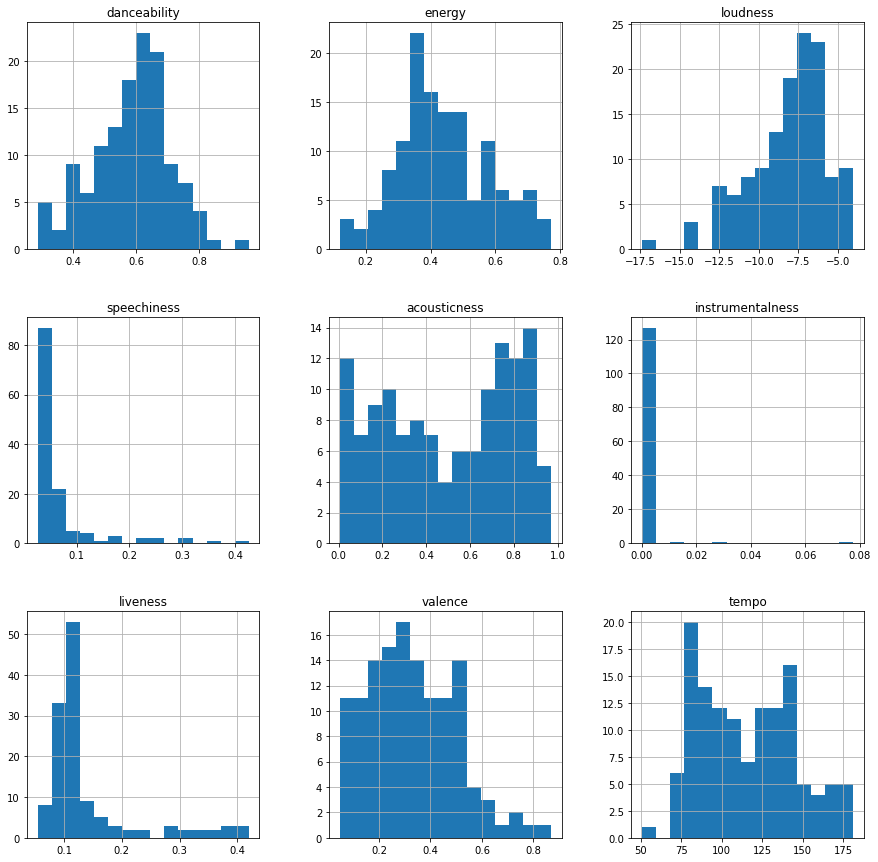

In [9]:
# visualise data to check the shape has not changed through scaling 
data_selected.hist(bins=15,figsize=(15,15));


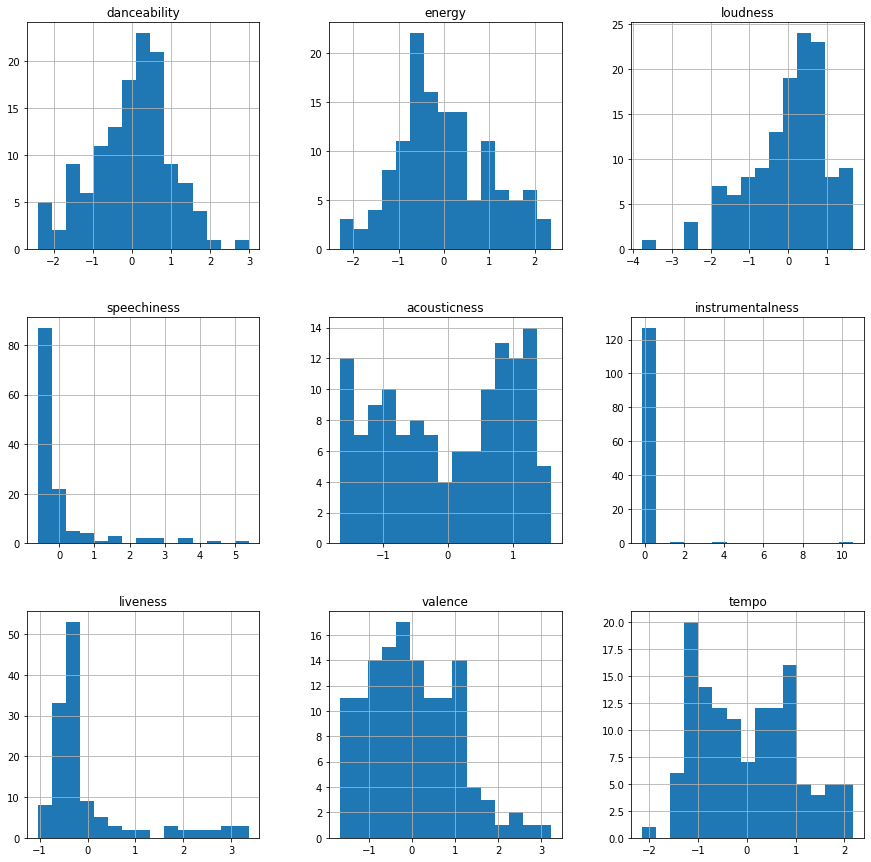

In [10]:
data_scaled.hist(bins=15,figsize=(15,15));

In [11]:
# Use methos KMeans in scaled dataframe - use consistent random state
model = KMeans(n_clusters=10,random_state=5)
cluster_scaled = model.fit(data_scaled)


In [12]:
# Show the coordinates of each cluster
cluster_scaled.cluster_centers_

array([[-5.35625936e-01,  4.29335489e-01,  3.02442521e-01,
        -3.44784833e-01, -1.04488339e+00, -1.60318225e-02,
        -3.78316667e-01, -7.65616386e-01, -2.00014465e-01],
       [ 2.28798011e-01, -4.11830072e-01,  2.25121298e-01,
        -3.52658307e-01,  7.98352511e-01, -1.32599480e-01,
        -3.76984816e-01, -3.49908590e-01,  2.56085274e-01],
       [ 1.76782184e-01, -1.23872224e+00, -2.42867225e+00,
         3.16303437e-01,  1.27825960e+00, -1.24532760e-01,
        -1.38111378e-01, -1.63845523e-01,  2.92267664e-01],
       [ 3.45351993e-01, -9.67188344e-01, -1.46795728e+00,
        -3.63990713e-01,  1.30139173e+00,  1.05595162e+01,
        -2.01590258e-01, -8.23483045e-01, -1.27968524e+00],
       [ 1.15892561e+00,  3.23590286e-02,  3.09393288e-01,
        -2.92127103e-01, -4.76340748e-01, -1.31745224e-01,
        -2.23001973e-01,  1.00543696e+00, -4.13603700e-01],
       [ 8.38967792e-02,  8.42398967e-02,  1.87808271e-01,
        -4.17066687e-02, -4.46081354e-02, -9.589960

In [13]:
# Show the cluster of each row
cluster_scaled.labels_

array([8, 7, 8, 1, 9, 8, 7, 8, 1, 1, 5, 4, 4, 8, 0, 8, 0, 9, 8, 4, 5, 4,
       1, 4, 5, 9, 9, 9, 1, 7, 0, 5, 4, 9, 7, 4, 1, 1, 5, 8, 6, 8, 8, 1,
       1, 7, 7, 1, 1, 8, 5, 7, 4, 5, 2, 8, 7, 6, 8, 1, 4, 6, 5, 9, 0, 2,
       4, 7, 0, 9, 4, 1, 2, 4, 7, 1, 7, 0, 5, 0, 4, 4, 0, 3, 4, 2, 5, 0,
       0, 1, 9, 4, 5, 1, 9, 7, 9, 5, 0, 0, 1, 7, 1, 7, 1, 1, 5, 0, 7, 1,
       8, 1, 5, 1, 0, 8, 0, 7, 6, 7, 4, 9, 2, 8, 8, 1, 2, 7, 0, 1])

In [14]:
#add cluster back into scaled data
data_scaled['cluster_no'] = cluster_scaled.labels_
data_scaled

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster_no
0,-1.316265,-0.724237,0.642356,-0.473417,1.277695,-0.133846,0.099734,-0.631966,-1.272414,8
1,0.915278,1.226520,1.679920,-0.387975,-0.387818,-0.136286,-0.627059,0.547063,-0.911494,7
2,-1.557079,0.947840,-0.428757,1.548728,1.128747,0.110435,0.051522,1.199419,-1.142966,8
3,0.144674,-0.538451,0.256952,-0.576848,0.265524,-0.136286,-0.093114,-1.188563,0.877905,1
4,-0.192466,-0.445557,0.213584,2.463115,0.089494,-0.136286,0.123839,-0.422494,1.869499,9
...,...,...,...,...,...,...,...,...,...,...
125,1.517314,-0.224043,0.272499,-0.304031,0.759761,-0.132674,-0.322120,-0.183097,0.054005,1
126,0.385488,-1.117247,-2.397510,0.210125,1.480807,-0.086804,1.100129,-0.751664,0.468512,2
127,0.224945,1.469471,1.418074,-0.214091,-1.458554,-0.136286,-0.442649,0.235847,1.604362,7
128,-0.553687,-0.045402,0.251633,-0.582844,-0.337040,-0.136286,-0.213643,0.038345,-0.584570,0


In [15]:
data_scaled['cluster_no'].value_counts()

1    25
7    18
8    17
4    17
0    16
5    14
9    12
2     6
6     4
3     1
Name: cluster_no, dtype: int64

## With normal data

In [16]:
# New Dataframe to keep the original
data_normal = data_selected

In [17]:
# Use methos KMeans in normal dataframe - use consistent random state
cluster_normal = model.fit(data_normal)

In [18]:
# Show the coordinates of each cluster
cluster_normal.cluster_centers_

array([[ 4.84900000e-01,  3.54800000e-01, -9.15600000e+00,
         9.79000000e-02,  5.59400000e-01,  4.10466000e-04,
         1.86900000e-01,  3.36120000e-01,  1.73994300e+02],
       [ 6.61642857e-01,  3.76071429e-01, -8.45378571e+00,
         6.58714286e-02,  5.77457143e-01,  2.90650000e-05,
         1.59342857e-01,  3.32514286e-01,  1.07529429e+02],
       [ 6.24461538e-01,  5.45384615e-01, -6.99007692e+00,
         1.21046154e-01,  2.79615385e-01,  7.81015385e-05,
         1.66453846e-01,  3.90207692e-01,  8.92913077e+01],
       [ 6.29533333e-01,  4.40733333e-01, -7.59180000e+00,
         4.50533333e-02,  4.61200000e-01,  1.94154000e-04,
         1.37533333e-01,  2.89133333e-01,  1.31204200e+02],
       [ 2.86000000e-01,  4.45000000e-01, -8.08700000e+00,
         3.47000000e-02,  3.55000000e-01,  0.00000000e+00,
         1.14000000e-01,  2.78000000e-01,  5.08270000e+01],
       [ 5.68866667e-01,  5.13266667e-01, -7.27060000e+00,
         5.07600000e-02,  4.25904000e-01,  1.900000

In [19]:
# Show the cluster of each row
cluster_normal.labels_

array([7, 2, 7, 6, 0, 7, 5, 7, 3, 6, 8, 5, 8, 7, 3, 7, 3, 0, 4, 6, 3, 2,
       1, 1, 6, 9, 0, 6, 6, 6, 7, 1, 7, 0, 3, 2, 1, 6, 2, 7, 2, 7, 7, 8,
       5, 5, 6, 8, 7, 7, 1, 5, 7, 6, 9, 7, 7, 1, 5, 6, 7, 2, 0, 9, 6, 7,
       1, 8, 2, 8, 1, 2, 8, 3, 9, 6, 6, 1, 0, 5, 8, 7, 3, 7, 1, 1, 6, 3,
       7, 3, 0, 8, 1, 3, 9, 5, 0, 0, 3, 5, 5, 3, 8, 2, 1, 6, 3, 1, 5, 8,
       7, 3, 2, 5, 8, 5, 2, 2, 2, 6, 5, 0, 6, 7, 7, 8, 3, 9, 5, 6])

In [20]:
#add cluster back into normal data
data_normal['cluster_no'] = cluster_normal.labels_
data_normal

C:\Users\Agus\AppData\Local\Temp/ipykernel_9400/263779458.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_normal['cluster_no'] = cluster_normal.labels_


,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster_no
0,0.422,0.340,-6.577,0.0351,0.8770,0.000018,0.1490,0.223,77.213,7
1,0.700,0.613,-4.041,0.0408,0.3850,0.000000,0.0887,0.420,88.084,2
2,0.392,0.574,-9.195,0.1700,0.8330,0.001790,0.1450,0.529,81.112,7
3,0.604,0.366,-7.519,0.0282,0.5780,0.000000,0.1330,0.130,141.981,6
4,0.562,0.379,-7.625,0.2310,0.5260,0.000000,0.1510,0.258,171.848,0
...,...,...,...,...,...,...,...,...,...,...
125,0.775,0.410,-7.481,0.0464,0.7240,0.000026,0.1140,0.298,117.165,8
126,0.634,0.285,-14.007,0.0807,0.9370,0.000359,0.2320,0.203,129.650,3
127,0.614,0.647,-4.681,0.0524,0.0687,0.000000,0.1040,0.368,163.862,9
128,0.517,0.435,-7.532,0.0278,0.4000,0.000000,0.1230,0.335,97.931,5


In [21]:
data_normal['cluster_no'].value_counts()

7    24
6    19
5    15
3    15
1    14
2    13
8    13
0    10
9     6
4     1
Name: cluster_no, dtype: int64

# Getting the best K

In [22]:
###  3 metrics : inertia, distortion, silouhette score 

In [23]:
# lets remove the cluster from my df to make the model again
data_scaled = data_scaled.drop('cluster_no',axis=1)
data_scaled

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,-1.316265,-0.724237,0.642356,-0.473417,1.277695,-0.133846,0.099734,-0.631966,-1.272414
1,0.915278,1.226520,1.679920,-0.387975,-0.387818,-0.136286,-0.627059,0.547063,-0.911494
2,-1.557079,0.947840,-0.428757,1.548728,1.128747,0.110435,0.051522,1.199419,-1.142966
3,0.144674,-0.538451,0.256952,-0.576848,0.265524,-0.136286,-0.093114,-1.188563,0.877905
4,-0.192466,-0.445557,0.213584,2.463115,0.089494,-0.136286,0.123839,-0.422494,1.869499
...,...,...,...,...,...,...,...,...,...
125,1.517314,-0.224043,0.272499,-0.304031,0.759761,-0.132674,-0.322120,-0.183097,0.054005
126,0.385488,-1.117247,-2.397510,0.210125,1.480807,-0.086804,1.100129,-0.751664,0.468512
127,0.224945,1.469471,1.418074,-0.214091,-1.458554,-0.136286,-0.442649,0.235847,1.604362
128,-0.553687,-0.045402,0.251633,-0.582844,-0.337040,-0.136286,-0.213643,0.038345,-0.584570


In [24]:
K = range(8,18)
inertia = []
for k in K:
    best_model = KMeans(n_clusters=k,random_state=5)
    best_model.fit(data_scaled)
    inertia.append(best_model.inertia_)

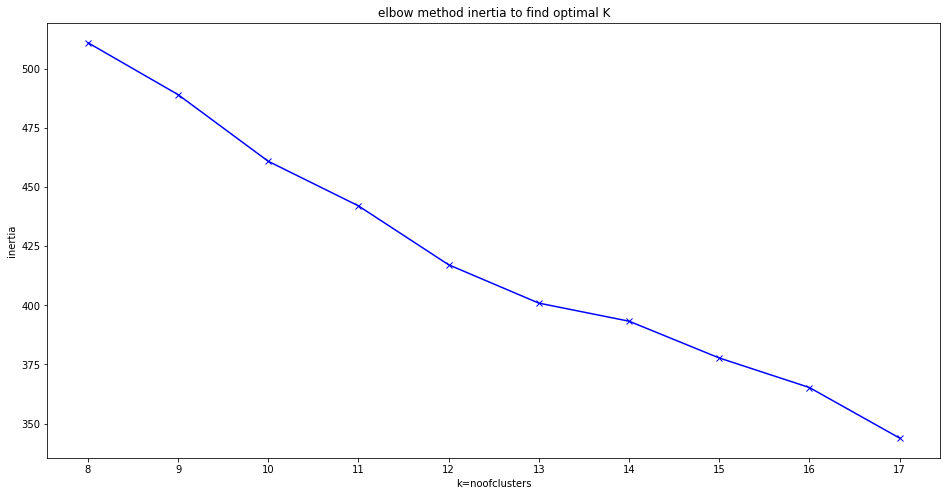

In [25]:
#plot the resulting inertia - elbow 
plt.figure(figsize=(16,8))
plt.plot(K,inertia,'bx-')
plt.xlabel('k=noofclusters')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K),max(K)+1,1.0))
plt.title('elbow method inertia to find optimal K');

In [26]:
K = range(5,18)
sil = []
for k in K:
    best_model = KMeans(n_clusters=k,random_state=5)
    best_model.fit(data_scaled)
    sil.append(silhouette_score(data_scaled,best_model.predict(data_scaled)))

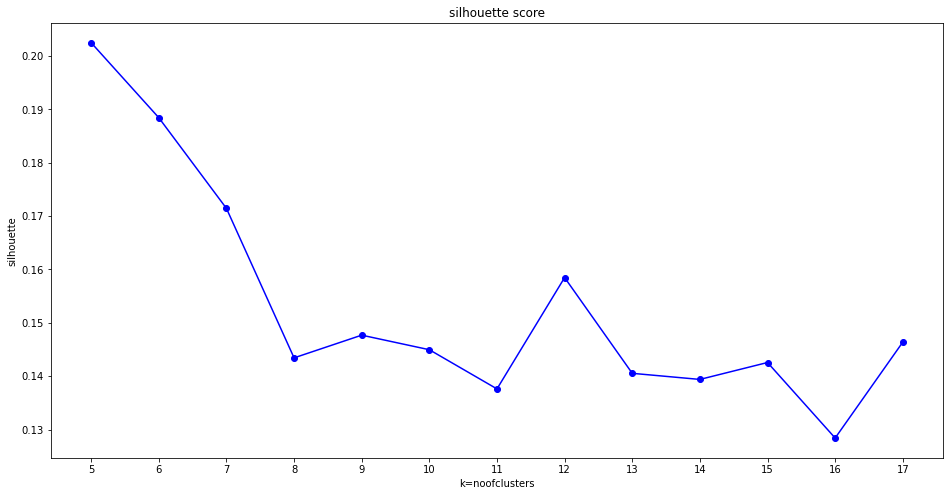

In [27]:
#plot the resulting silhouette 
plt.figure(figsize=(16,8))
plt.plot(K,sil,'bo-')
plt.xlabel('k=noofclusters')
plt.ylabel('silhouette')
plt.xticks(np.arange(min(K),max(K)+1,1.0))
plt.title('silhouette score');

In [28]:
# watching the plot, 11 seems the best k
# Try again with scaled data and best k
model=KMeans(n_clusters=11, random_state=5)
cluster_best=model.fit(data_scaled)
data_scaled['cluster_final'] = cluster_best.labels_

In [29]:
data_scaled['cluster_final'].value_counts()

10    19
6     18
8     17
2     16
4     15
9     13
1     12
0     12
7      5
5      2
3      1
Name: cluster_final, dtype: int64

In [30]:
data_scaled.head(1)

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster_final
0,-1.316265,-0.724237,0.642356,-0.473417,1.277695,-0.133846,0.099734,-0.631966,-1.272414,10


In [47]:
def spotify_display(song_name_id):
        display(IFrame(src=f"https://open.spotify.com/embed/track/{song_name_id}",
                        width="320",
                        height="80",
                        frameborder="0",
                        allowtransparency="true",
                        allow="encrypted-media",))

# Show results with GUI (Tkinter)

In [48]:
# Create a new window
def try_again(window):
    window.destroy()
    create()

# Close window
def close(window):
    window.destroy()

# Show the results after compare input and top[song] when the match is positive
# Check has the Dataframe with 1 positive result
def but_yes(window,check):
    # Create a new dataframe without result to avoid repeat
    result = top.drop(labels=check.index, axis=0)

    # Create a new dataframe with a random sample to share
    result = result.sample()
    song_res = result['Song'].item()
    artist_res = result['Artist'].item()

    # Change size os window
    window.geometry("")
    # Show the results
    res1 = tk.Label(window, text = 'Nice choice, your song is in the top 100, maybe you like this one too')
    res1.pack(fill = tk.X)
    res2 = tk.Label(window, text = f'{song_res} - {artist_res}')
    res2.pack(fill = tk.X)
    space = tk.Label(window, text = "   ")
    space.pack(fill = tk.X)
    
    #  Ask for Try Again
    label_no = tk.Label(window, text = 'Do you want to try again?')
    label_no.pack(fill = tk.X)
    button_retry = tk.Button(window, text = 'Try again', command = lambda: try_again(window))
    button_retry.pack()
    button_close = tk.Button(window, text = 'Close', command = lambda: close(window))
    button_close.pack()

#If the match is negative, show the result and ask for Try Again
def but_no(window,best):
    track = 'abcdefu'
    artist = 'gayle'
    # track_id is a request wit artist & song
    track_id = sp.search(q='track:' + best, type='track', limit=1)
    track_id
    
    # x is the id that we are looking for
    x = track_id["tracks"]['items'][0]['id']
    x
    
    ###############################################spotify_display(x)
    
    # audio_feature is a dataframe with the results 
    audio_feat=pd.DataFrame(sp.audio_features(tracks=x))
    audio_feat
    
    # get the main columns for  clustering
    audio_feat = audio_feat[['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence','tempo']]
    audio_feat
    
    # fit without column cluster
    scaler=StandardScaler()
    model = scaler.fit(data_scaled.drop('cluster_final',axis=1)).transform(audio_feat)
    model
    
    # dataframe with audio feature scaled
    audio_scaled = pd.DataFrame(model, index=audio_feat.index, columns=audio_feat.columns)
    audio_scaled
    
    # predict the cluster and get the number
    model=KMeans(n_clusters=11, random_state=5)
    cluster_best=model.fit(data_scaled.drop('cluster_final',axis=1))
    pred = cluster_best.predict(audio_scaled)
    pred[0]
    
    # use new cluster to get a index of random song with the same cluster
    samp = data_scaled[data_scaled.cluster_final==pred[0]].sample(1).index.item()
    samp
    
    # use that index to get the id of new song
    data_samp = data[samp:samp+1]
    data_samp
    
    #use id to get the song and the artist name
    for key, value in list_info.items():
        if key == data_samp['id'].item():
            song_artist = value
    
    #Buttons
    label_no = tk.Label(window, text = f'Sorry, I dont know what song you mean.\n But according to your song you may like this one. \n {song_artist[0]} - {song_artist[1]} \n Do you want to try again?')
    label_no.pack(fill = tk.X)
    button_retry = tk.Button(window, text = 'Try again', command = lambda: try_again(window))
    button_retry.pack()
    button_close = tk.Button(window, text = 'Close', command = lambda: close(window))
    button_close.pack()

# Get data from inputs
def get_data(input_song,window):
    # Transform to string
    songs = input_song.get()
    if len(songs) == 0:
        messagebox.showwarning('Error','You need to enter at least one song.')
    else:        
        # fuzz token compare the input with the songs of the dataframe
        # we save in -best- the best result
        res = 0
        for x in top['Song']:
            if fuzz.token_set_ratio(x,songs) > res:
                res = fuzz.token_set_ratio(x,songs)
                best = x

        # get data from best result
        check = top[(top['Song']==best)]
        artist = check['Artist'].item()

        # Show the results
        window.geometry("")
        ask = tk.Label(window, text = f'Did you mean this song? ->  {best} - {artist}')
        ask.pack(fill = tk.X)
    
        button_yes = tk.Button(window, text = 'Yes', command = lambda: but_yes(window,check))
        button_yes.pack()
        button_no = tk.Button(window, text = 'No', command = lambda: but_no(window,best))
        button_no.pack()
        space = tk.Label(window, text = "   ")
        space.pack(fill = tk.X)

# Create the main window
def create():
    
    # Create a window
    window = tk.Tk()

    #Change size os window
    window.geometry("")

    # Title
    title = tk.Label(window, text = 'Enter a song and/or an artist to see if its in the top 100', bg = 'gray51')
    title.pack(fill = tk.X)

    #Take song
    title_song = tk.Label(window, text = 'Enter a song')
    title_song.pack(fill = tk.X)
    input_song = tk.Entry(window)
    input_song.pack()

    button_search = tk.Button(window, text = 'Search', command = lambda: get_data(input_song,window))
    button_search.pack()
    space = tk.Label(window, text = "   ")
    space.pack(fill = tk.X)
    
    #That comand open the window
    window.mainloop()

In [49]:
create()

Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\Agus\anaconda3\envs\class\lib\tkinter\__init__.py", line 1892, in __call__
    return self.func(*args)
  File "C:\Users\Agus\AppData\Local\Temp/ipykernel_9400/1887801077.py", line 123, in <lambda>
    button_no = tk.Button(window, text = 'No', command = lambda: but_no(window,best))
  File "C:\Users\Agus\AppData\Local\Temp/ipykernel_9400/1887801077.py", line 51, in but_no
    spotify_display(x)
  File "C:\Users\Agus\AppData\Local\Temp/ipykernel_9400/2258354827.py", line 2, in spotify_display
    display(IFrame(src=f"https://open.spotify.com/embed/track/{song_name_id}",
NameError: name 'IFrame' is not defined
